In [10]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 10

In [4]:
names1880 = pd.read_csv('data/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [23]:
years = range(1880, 2018)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [19]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1924660,Zykai,M,5,2017
1924661,Zykeem,M,5,2017
1924662,Zylin,M,5,2017
1924663,Zylis,M,5,2017


In [20]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


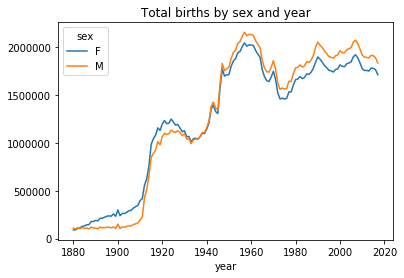

In [21]:
total_births.plot(title='Total births by sex and year')

In [25]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1924660,Zykai,M,5,2017,0.000003
1924661,Zykeem,M,5,2017,0.000003
1924662,Zylin,M,5,2017,0.000003
1924663,Zylis,M,5,2017,0.000003


In [26]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2015  M      1.0
2016  F      1.0
      M      1.0
2017  F      1.0
      M      1.0
Name: prop, Length: 276, dtype: float64

In [27]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [28]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
275872,Eliezer,M,202,2017,0.000110
275873,Ramiro,M,202,2017,0.000110
275874,Yisroel,M,202,2017,0.000110
275875,Marquis,M,201,2017,0.000110


In [40]:
top1000[top1000.name=='Mary'].head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1268,Mary,M,27,1880,0.000244
1942,Mary,F,6919,1881,0.075245
3177,Mary,M,29,1881,0.000288
3877,Mary,F,8148,1882,0.075551


In [41]:
boys = top1000[top1000.sex == 'M']
boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086269
944,James,M,5927,1880,0.053642
945,Charles,M,5348,1880,0.048402
946,George,M,5126,1880,0.046393


In [42]:
girls = top1000[top1000.sex == 'F']
girls.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [44]:
total_births = top1000.pivot_table('births', index='year',
                                    columns='name',
                                    aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,203.0,NaN,5229.0,NaN,495.0,7301.0,NaN,NaN,NaN,NaN,...,5969.0,7238.0,432.0,NaN,NaN,NaN,NaN,NaN,568.0,NaN
2014,238.0,NaN,4877.0,266.0,531.0,7391.0,NaN,NaN,NaN,NaN,...,5870.0,7401.0,365.0,NaN,NaN,NaN,NaN,NaN,666.0,NaN
2015,297.0,NaN,4859.0,NaN,540.0,7152.0,211.0,NaN,NaN,NaN,...,6038.0,6941.0,371.0,NaN,NaN,NaN,NaN,NaN,713.0,NaN


In [45]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA07E5C2B0>,
      dtype=object)

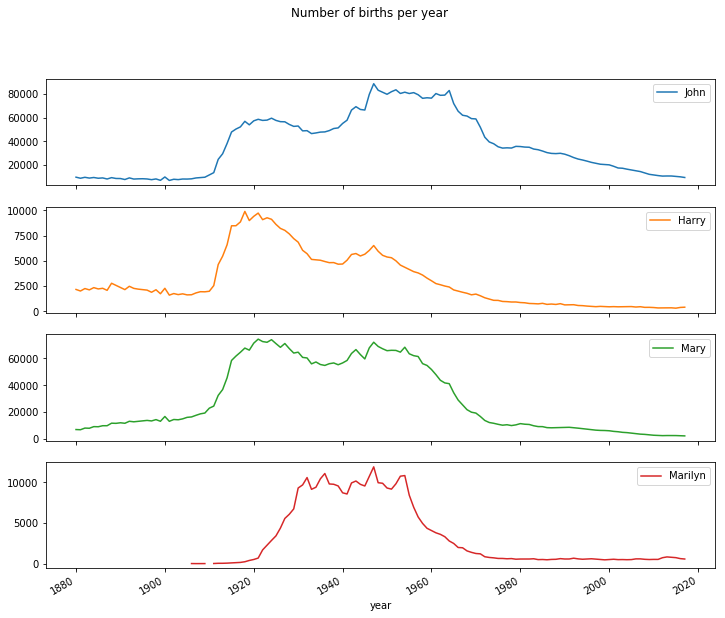

In [46]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

In [47]:
table = top1000.pivot_table('prop', index='year',
                             columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2013,0.739979,0.843230
2014,0.743431,0.842633
2015,0.742381,0.841002


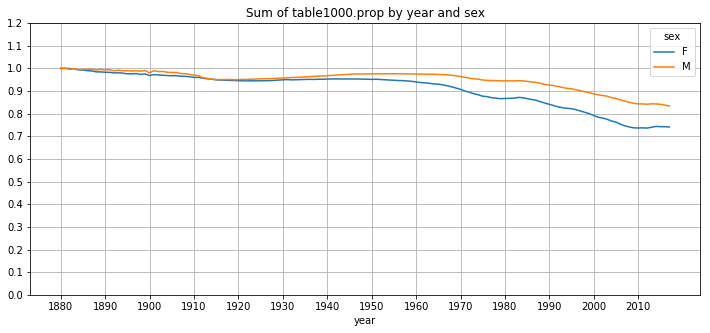

In [54]:
import numpy as np
table.plot(title='Sum of table1000.prop by year and sex', figsize=(12, 5),
        grid=True, yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [56]:
df = boys[boys.year == 2017]
df

,name,sex,births,year,prop
274877,Liam,M,18728,2017,0.010209
274878,Noah,M,18326,2017,0.009990
274879,William,M,14904,2017,0.008124
274880,James,M,14232,2017,0.007758
274881,Logan,M,13974,2017,0.007617
...,...,...,...,...,...
275872,Eliezer,M,202,2017,0.000110
275873,Ramiro,M,202,2017,0.000110
275874,Yisroel,M,202,2017,0.000110
275875,Marquis,M,201,2017,0.000110


In [57]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

274877    0.010209
274878    0.020199
274879    0.028323
274880    0.036081
274881    0.043698
274882    0.051184
274883    0.058544
274884    0.065777
274885    0.072940
274886    0.080084
Name: prop, dtype: float64

In [59]:
prop_cumsum.values.searchsorted(0.5) + 1

143

In [60]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [62]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2013,241,126
2014,242,131
2015,243,135


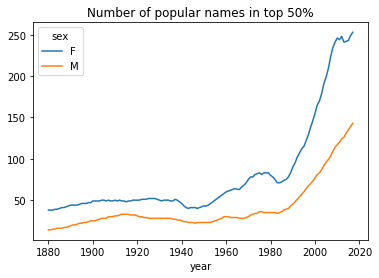

In [63]:
diversity.plot(title="Number of popular names in top 50%")

In [64]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [65]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2008      2009   
last_letter                               ...                          
a            48942.0  59440.0  58631.0    ...      33020.0   31617.0   
b                NaN      NaN      NaN    ...      40080.0   39082.0   
c                NaN      NaN      NaN    ...      25389.0   24150.0   
d             1027.0   1298.0   1374.0    ...      48062.0   46345.0   
e            54352.0  66748.0  66662.0    ...     141334.0  135981.0   
...              ...      ...      ...    ...          ...       ...   
v                NaN      NaN      NaN    ...       2423.0    2597.0   
w                NaN      NaN      NaN    ...      37040.0   33359.0   
x                NaN      NaN      NaN    ...      14861.0   16697.0   
y            14980.0  17928.0  17600.0    ...     122975.0  113418.0   
z              188.0    238.0    277.0    ...       3490.0    3648.0   

sex                                                                      \
year             2010      2011      2012      2013      2014      2015   
last_letter                                                               
a             28859.0   27439.0   27201.0   27419.0   28247.0   28952.0   
b             39264.0   36667.0   34706.0   33226.0   31353.0   29557.0   
c             23341.0   23125.0   24268.0   24047.0   23805.0   23106.0   
d             44817.0   43231.0   42457.0   42658.0   43990.0   43717.0   
e            130228.0  128748.0  128430.0  132126.0  131978.0  128384.0   
...               ...       ...       ...       ...       ...       ...   
v              2777.0    2792.0    2834.0    2942.0    2999.0    3130.0   
w             30992.0   29962.0   29195.0   27581.0   26589.0   25255.0   
x             16471.0   16654.0   17031.0   17719.0   18802.0   19846.0   
y            111474.0  110103.0  109023.0  106253.0  105420.0  102015.0   
z              3497.0    3545.0    3606.0    3649.0    3566.0    3418.0   

sex                              
year             2016      2017  
last_letter                      
a             29647.0   29998.0  
b             26926.0   24368.0  
c             22006.0   20430.0  
d             42917.0   41862.0  
e            125781.0  121216.0  
...               ...       ...  
v              3125.0    3130.0  
w             24299.0   22047.0  
x             20624.0   20662.0  
y             97073.0   91567.0  
z              3291.0    3387.0  

[26 rows x 276 columns]

In [66]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691250.0  676646.0    977.0    5212.0   28859.0
b                 NaN     694.0     455.0    411.0    3914.0   39264.0
c                 5.0      49.0     955.0    482.0   15460.0   23341.0
d              6751.0    3730.0    2640.0  22113.0  262136.0   44817.0
e            133600.0  435043.0  316665.0  28665.0  178785.0  130228.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     208.0     22.0      77.0    2777.0
w                 8.0      63.0    2111.0   1228.0   16439.0   30992.0
x                 6.0      74.0    1294.0    770.0    3946.0   16471.0
y             44002.0  308462.0  207236.0  15021.0  343259.0  111474.0
z               966.0    1330.0    1243.0     33.0     393.0    3497.0

[26 rows x 6 columns]

In [67]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022018.0
     2010    1774758.0
M    1910     194213.0
     1960    2132359.0
     2010    1915942.0
dtype: float64

In [68]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273383  0.341861  0.381261  0.005031  0.002444  0.015063
b                 NaN  0.000343  0.000256  0.002116  0.001836  0.020493
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122932  0.023392
e            0.336947  0.215153  0.178427  0.147596  0.083844  0.067971
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001189  0.006323  0.007709  0.016176
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008597
y            0.110975  0.152552  0.116769  0.077343  0.160976  0.058182
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001825

[26 rows x 6 columns]

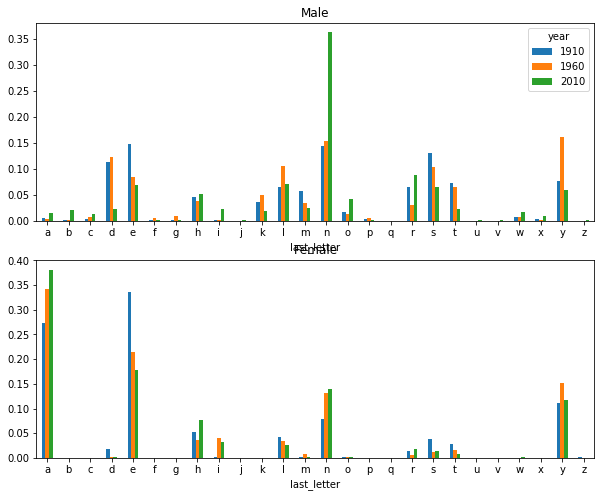

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [70]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086122,0.149927,0.080408


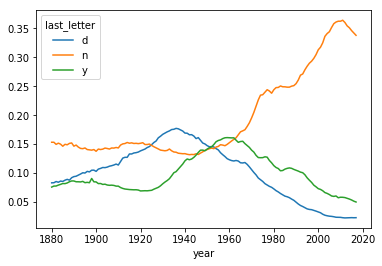

In [71]:
dny_ts.plot()

In [72]:
all_names = pd.Series(top1000.name.unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
7129        Zahir
7130       Ledger
7131     Gianluca
7132       Alaric
7133       Decker
Length: 7134, dtype: object

In [73]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6107     Lesly
dtype: object

In [74]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
268213,Leslie,F,1000,2014,0.000561
268841,Lesly,F,276,2014,0.000155
270247,Leslie,F,878,2015,0.000494
272290,Leslie,F,802,2016,0.000455


In [75]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    377561
Lesly      11432
Name: births, dtype: int64

In [76]:
table = filtered.pivot_table('births', index='year',
                              columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2013,1424.0,NaN
2014,1276.0,NaN
2015,878.0,NaN


In [77]:
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2013,1.000000,NaN
2014,1.000000,NaN
2015,1.000000,NaN


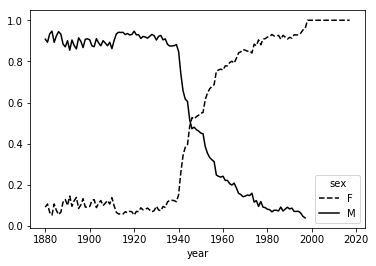

In [78]:
table.plot(style={'M': 'k-', 'F': 'k--'})